In [1]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import externals
from joblib import dump

In [2]:

dataset = pd.read_pickle("clean_data")
print(dataset)

          age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323       0      1      0   
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373       0      0      1   
300  1.503641  0.706843 -1.029353 -0.378132  2.036303       0      0      1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862       0      1      0   

     cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca

In [3]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [4]:

knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
max(knn_scores)

0.8791208791208791

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

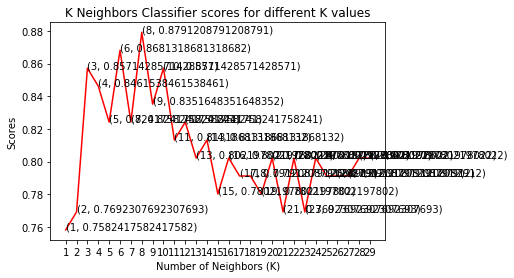

In [5]:

plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [6]:

print("The score for K Neighbors Classifier is {}% .".format(max(knn_scores)*100))

The score for K Neighbors Classifier is 87.91208791208791% .


In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
knn_classifier.fit(X_train, y_train)

dump(knn_classifier, 'KNN_classifier.joblib.z')



['KNN_classifier.joblib.z']

In [8]:
for i in range(len(X_test)):
    print(knn_classifier.predict(X_test.iloc[[ i ]]), y_test.iloc[[i]])

[0] 225    0
Name: target, dtype: int64
[0] 152    1
Name: target, dtype: int64
[0] 228    0
Name: target, dtype: int64
[0] 201    0
Name: target, dtype: int64
[0] 52    1
Name: target, dtype: int64
[1] 245    0
Name: target, dtype: int64
[0] 175    0
Name: target, dtype: int64
[0] 168    0
Name: target, dtype: int64
[0] 223    0
Name: target, dtype: int64
[0] 217    0
Name: target, dtype: int64
[1] 111    1
Name: target, dtype: int64
[1] 135    1
Name: target, dtype: int64
[0] 218    0
Name: target, dtype: int64
[1] 12    1
Name: target, dtype: int64
[1] 15    1
Name: target, dtype: int64
[1] 66    1
Name: target, dtype: int64
[0] 97    1
Name: target, dtype: int64
[1] 90    1
Name: target, dtype: int64
[0] 198    0
Name: target, dtype: int64
[1] 103    1
Name: target, dtype: int64
[1] 22    1
Name: target, dtype: int64
[0] 212    0
Name: target, dtype: int64
[0] 226    0
Name: target, dtype: int64
[0] 264    0
Name: target, dtype: int64
[1] 133    1
Name: target, dtype: int64
[0] 216